In [1]:
import dkist
import sunpy.map
import astropy.units as u
import matplotlib.pyplot as plt

In [2]:
aia = sunpy.map.Map("./data/AIA/aia_lev1_171a_2022_10_24t18_55_09_34z_image_lev1.fits")

In [17]:
m_hri = sunpy.map.Map('data/EUI/solo_L2_eui-hrieuv174-image_20221024T191510172_V01.fits')

In [4]:
visp = dkist.load_dataset("./data/VISP/VISP_L1_20221024T185745_BKEWK_corrected.asdf")

In [5]:
visp

This Dataset has 4 pixel and 5 world dimensions

dask.array<reshape, shape=(4, 688, 976, 2555), dtype=float64, chunksize=(1, 1, 976, 2555), chunktype=numpy.ndarray>

Pixel Dim  Axis Name                Data size  Bounds
        0  polarization state               4  None
        1  raster scan step number        688  None
        2  dispersion axis                976  None
        3  spatial along slit            2555  None

World Dim  Axis Name                  Physical Type                   Units
        0  stokes                     phys.polarization.stokes        unknown
        1  time                       time                            s
        2  helioprojective latitude   custom:pos.helioprojective.lat  arcsec
        3  wavelength                 em.wl                           nm
        4  helioprojective longitude  custom:pos.helioprojective.lon  arcsec

Correlation between pixel and world axes:

               Pixel Dim
World Dim    0    1    2    3
        0  yes   no

In [7]:
# Dear god we need a better way of doing this.
visp_frame = visp.wcs.output_frame.frames[1].reference_frame

In [9]:
visp_space = visp[0, :, 500, :]

In [13]:
visp_space = visp[0, :, 500, :]
visp_corners = visp_space.wcs.pixel_to_world([0, visp_space.data.shape[1]-1],[0, visp_space.data.shape[0]-1])[0]

In [14]:
visp_corners

<SkyCoord (Helioprojective: obstime=2022-10-24T19:15:37.808, rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=2022-10-24T19:15:37.808, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, m)
    (0.00194586, 5.09422087, 1.48793224e+11)>): (Tx, Ty) in arcsec
    [(-462.28215137, 200.89941089), (-444.90807963, 356.01856273)]>

(725.0, 2048.0, 2048.0, 3072.0)

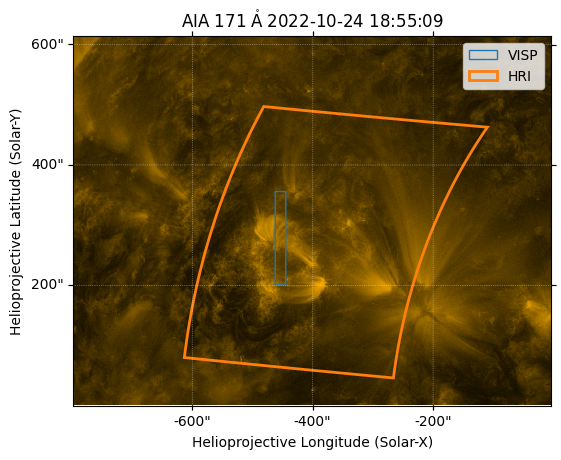

In [45]:
fig = plt.figure()
ax = fig.add_subplot(projection=aia)
aia.plot()
aia.draw_quadrangle(
    visp_corners,
    label="VISP",
    edgecolor='C0',
    lw=1,
    transform=ax.get_transform(visp_frame)
)
aia.draw_quadrangle(
    bottom_left=m_hri.bottom_left_coord,
    top_right=m_hri.top_right_coord,
    label='HRI',
    edgecolor='C1',
    lw=2,
    transform=ax.get_transform(m_hri.coordinate_frame),
)
plt.legend()
ax.axis((725, 2048, 2048, 3072))